CNN卷積神經網路簡介

Step 1. MLP多層感知器 vs. CNN眷積神經網路

In [1]:
#Step1. 匯入所需模組
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#Step2. 讀取mnist資料
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [20]:
#Step3. 將features(數字影像特徵值)轉換為4維矩陣
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [21]:
#Step4. 將fetures(數字影像特徵值)標準化
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [6]:
#Step5. label(數字的真實的值)以Onehot encoding轉換
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

建立模型

In [8]:
#Step1. 匯入所需模組
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [9]:
#Step2. 建立keras的Sequential模型
model = Sequential()

In [11]:
#Step3. 建立卷積層1與池化層1
#建立卷積層1
model.add(Conv2D(filters = 16,                 #建立16個濾鏡
                 kernel_size = (5, 5),         #每個濾鏡5x5大小
                 padding = 'same',             #此設定讓卷積運算，產生的卷積影像大小不變
                 input_shape = (28, 28, 1),    #第1,2維度:代表輸入的影像形狀28x28大小，第3個維度:因為為單色灰階影像所以維度為1
                 activation = 'relu'))         #設定ReLU激活函數
#建立池化層1
model.add(MaxPool2D(pool_size = (2, 2)))       #將16個28x28影像縮小為14x14影像

In [12]:
#Step4. 建立卷積層2與池化層2
#建立卷積層2
model.add(Conv2D(filters = 36,                 #建立36個濾鏡
                 kernel_size = (5, 5),         #每個濾鏡5x5大小
                 padding = 'same',             #此設定讓卷積運算，產生的卷積影像大小不變
                 activation = 'relu'))         #設定ReLU激活函數
#建立池化層2
model.add(MaxPool2D(pool_size = (2, 2)))       #將36個14x14影像縮小為7x7影像

In [13]:
#加入Dropout避免overfitting
model.add(Dropout(0.25))                       #每次迭代時，會隨機在神經網路中放棄25%神經元

In [14]:
#Step5. 建立神經網路(平坦層、隱藏層、輸出層)

#建立平坦層
model.add(Flatten())

#建立隱藏層
model.add(Dense(128, activation = 'relu'))

#加入Dropout
model.add(Dropout(0.5))

#建立輸出層
model.add(Dense(10, activation = 'softmax'))

In [16]:
#Step6. 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
__________

進行訓練

當我們建立深度學習的模型後，就可以使用反向傳播算法來進行訓練。

In [17]:
#Step1. 定義訓練方式
model.compile(loss = 'categorical_crossentropy',      #設定損失函數
              optimizer = 'adam',                     #使用adam最優化方法，讓訓練更快收斂，提高準確率
              metrics = ['accuracy'])                 #設定評估模型的方式為準確率

In [22]:
#Step2. 開始訓練
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 109s - loss: 0.4441 - acc: 0.8590 - val_loss: 0.0821 - val_acc: 0.9750
Epoch 2/10
 - 119s - loss: 0.1131 - acc: 0.9652 - val_loss: 0.0557 - val_acc: 0.9838
Epoch 3/10
 - 114s - loss: 0.0819 - acc: 0.9748 - val_loss: 0.0452 - val_acc: 0.9865
Epoch 4/10
 - 117s - loss: 0.0662 - acc: 0.9799 - val_loss: 0.0381 - val_acc: 0.9883
Epoch 5/10
 - 120s - loss: 0.0559 - acc: 0.9831 - val_loss: 0.0339 - val_acc: 0.9896
Epoch 6/10
 - 115s - loss: 0.0492 - acc: 0.9856 - val_loss: 0.0320 - val_acc: 0.9901
Epoch 7/10
 - 114s - loss: 0.0417 - acc: 0.9875 - val_loss: 0.0287 - val_acc: 0.9913
Epoch 8/10
 - 118s - loss: 0.0394 - acc: 0.9884 - val_loss: 0.0287 - val_acc: 0.9913
Epoch 9/10
 - 117s - loss: 0.0352 - acc: 0.9893 - val_loss: 0.0315 - val_acc: 0.9910
Epoch 10/10
 - 116s - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0284 - val_acc: 0.9908


In [24]:
#建立show_train_history顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

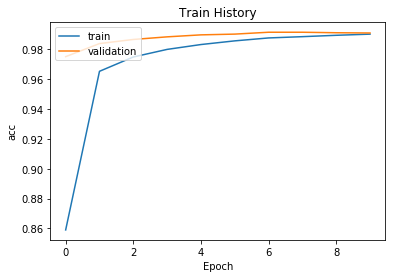

In [29]:
#Step3. 畫出accuracy執行結果
show_train_history(train_history,'acc', 'val_acc')

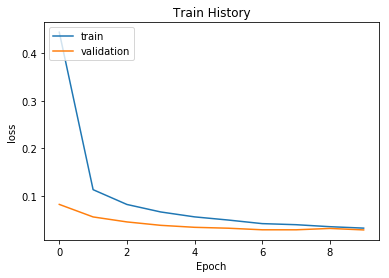

In [30]:
#Step4. 畫出loss誤差執行結果
show_train_history(train_history,'loss', 'val_loss')

評估模型準確率

In [32]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 10s 991us/step


0.9929

In [33]:
#Step1. 執行預測
prediction = model.predict_classes(x_Test4D_normalize)

In [34]:
#Step2. 預測結果
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

顯示混淆矩陣

In [35]:
#Step1. 使用pandas crosstab建立混淆矩陣(confusion matrix)
import pandas as pd
pd.crosstab(y_Test, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1127,1,2,0,0,1,1,3,0
2,2,0,1024,0,2,0,0,3,1,0
3,0,0,0,1008,0,1,0,0,1,0
4,0,0,0,0,977,0,1,1,0,3
5,0,0,0,6,0,884,1,0,0,1
6,4,2,0,0,1,2,947,0,2,0
7,0,1,2,4,0,0,0,1020,1,0
8,1,0,1,1,0,0,0,0,967,4


結論

卷積神經網路的準確率高於多元感知器